In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
filename='X_train'
infile = open(filename,'rb')
X_train=pickle.load(infile)
infile.close()

filename='y_train'
infile = open(filename,'rb')
y_tr=pickle.load(infile)
infile.close()

filename='X_test'
infile = open(filename,'rb')
X_test=pickle.load(infile)
infile.close()

filename='y_test'
infile = open(filename,'rb')
y_test=pickle.load(infile)
infile.close()

In [3]:
#Unpickling
import pickle

infile = open('count_vect_BOW','rb')
count_vect=pickle.load(infile)
infile.close()

infile = open('Train_BOW_Std','rb')
X_train_Bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_BOW_Std','rb')
X_test_BOW_standarized_data=pickle.load(infile)
infile.close()

infile = open('tf_idf_vect_TF-IDF','rb')
tf_idf_vect = pickle.load(infile)
infile.close()

infile = open('Train_TFIDF_Std','rb')
X_train_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_TFIDF_Std','rb')
X_test_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Train_AvgW2V_std','rb')
X_train_AvgW2V_standarized_data=pickle.load(infile)
infile.close()


infile = open('Test_AvgW2V_std','rb')
X_test_AvgW2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('TFIDF_W2V_Train_standarized_data','rb')
X_train_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()


In [4]:
infile = open('TFIDF_W2V_Test_standarized_data','rb')
X_test_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()

# GridSearch

In [5]:
def SGD_GRIDSEARCH(X_train,y_train):
    tuned_parameters = [{'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]                  
                    }]  
    svm=SGDClassifier(loss='hinge',class_weight = "balanced")
    model= GridSearchCV(svm,tuned_parameters, scoring = 'f1', cv=5,n_jobs=-1)
    model.fit(X_train, y_train)
    best_estimator= model.best_estimator_
    best_params = model.best_params_
    
    return best_estimator,best_params


# Random searchCV

In [8]:
def SGD_RandomSearchCV(X_train,y_train):
    alpha = uniform(loc=0, scale=1)
    tuned_parameters = dict(alpha=alpha)
    svm=SGDClassifier(loss='hinge',class_weight = "balanced")
    model= RandomizedSearchCV(svm,tuned_parameters, scoring = 'f1', cv=5,n_jobs=-1)
    model.fit(X_train, y_train)
    best_estimator= model.best_estimator_
    best_params = model.best_params_
    
    return best_estimator,best_params

# Training_Testing Errors 

In [6]:
def Train_Test_Error(alpha,X_train,y_train,X_test,y_test):
    svm=SGDClassifier(loss='hinge',class_weight = "balanced",alpha=alpha)
    svm_model = svm.fit(X_train, y_train)

    #Training Error
    y_pred_tr = svm_model.predict(X_train)
    acc_tr = accuracy_score(y_train, y_pred_tr)
    train_error = 1-acc_tr
    print('\n Train error is : {}'.format(train_error))

    #Test Error
    y_pred_ts = svm_model.predict(X_test)
    acc_ts = accuracy_score(y_test, y_pred_ts)
    test_error = 1-acc_ts
    print('\n Test error is : {}'.format(test_error))
    
    return train_error,test_error,y_pred_ts,svm_model

# CV_Error_Plot

In [7]:
def CV_Error_Plot(X_Train,y_Train):
    alpha_list= [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]

    # empty list that will hold cv scores
    cv_scores = []

    for alpha in alpha_list:
        svm=SGDClassifier(alpha=alpha,loss='hinge',class_weight = "balanced")
        scores = cross_val_score(svm, X_Train, y_Train, cv=3, scoring='accuracy',n_jobs=-1)
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_list[MSE.index(min(MSE))]
    print('\nThe optimal alpha is : {}'.format(optimal_alpha))

   # plt.ylim(min(MSE), max(MSE))
    #plt.xlim(min(alpha_list),max(alpha_list))
    # plot misclassification error vs alpha 
    plt.plot(alpha_list, MSE)

    for xy in zip(alpha_list, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Depth')
    plt.ylabel('Misclassification Error')
    plt.show()
    print("the misclassification error for each alpha value is : ", np.round(MSE,3)) 
    return optimal_alpha

# Confusion Matrix

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Important Features 

In [11]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

# SVM_BOW

Using GridSearch

In [12]:
best_estimator_bow,best_params_bow = SGD_GRIDSEARCH(X_train_Bow_standarized_data,y_tr)

In [13]:
print best_estimator_bow
print best_params_bow 

SGDClassifier(alpha=1.0, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
{'alpha': 1.0}


Using Random Search

In [31]:
best_estimator_bow_random,best_params_bow_random = SGD_RandomSearchCV(X_train_Bow_standarized_data,y_tr)

In [32]:
print best_estimator_bow_random
print best_params_bow_random

SGDClassifier(alpha=0.7538459825421077, average=False,
       class_weight='balanced', epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
{'alpha': 0.7538459825421077}


Errors using Randoms Search

In [33]:
train_error_bow_random,test_error_bow_random,y_pred_ts_bow_random,model_bow_random=Train_Test_Error(best_params_bow_random["alpha"],X_train_Bow_standarized_data,y_tr,X_test_BOW_standarized_data,y_test)


 Train error is : 0.064792812734

 Test error is : 0.11404808021


Errors using Grid Search

In [34]:
train_error_bow,test_error_bow,y_pred_ts_bow,model_bow=Train_Test_Error(best_params_bow["alpha"],X_train_Bow_standarized_data,y_tr,X_test_BOW_standarized_data,y_test)


 Train error is : 0.0631489860356

 Test error is : 0.110136341195


Error Plot


The optimal alpha is : 1.0


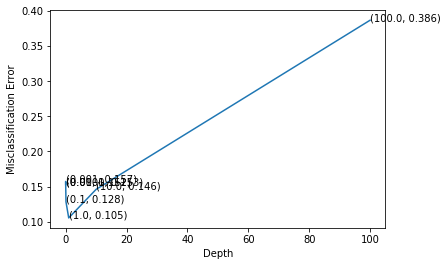

('the misclassification error for each alpha value is : ', array([0.153, 0.157, 0.152, 0.128, 0.105, 0.146, 0.386]))


In [45]:
optimal_alpha_bow = CV_Error_Plot(X_train_Bow_standarized_data,y_tr)


  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.65      0.80      0.71      4557
          1       0.96      0.91      0.93     21774

avg / total       0.90      0.89      0.89     26331


  CONFUSION MATRIX
[[ 3627   930]
 [ 1970 19804]]

  Plot of CONFUSION MATRIX


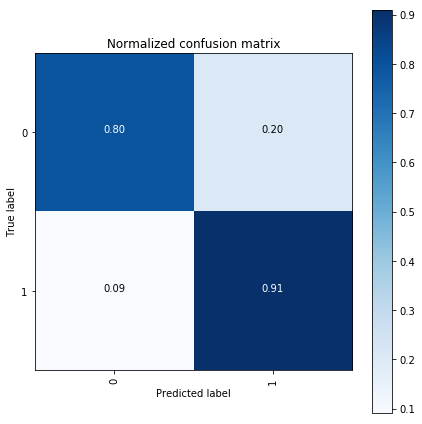

In [35]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_bow)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_bow)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

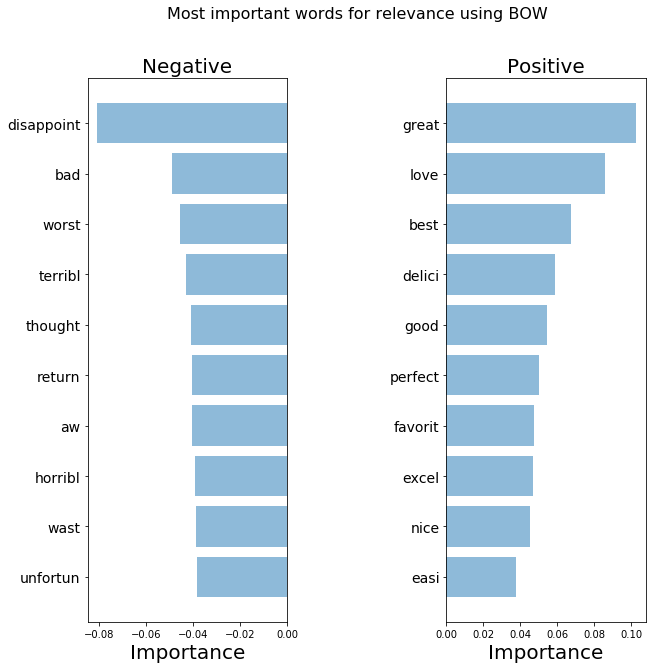

In [36]:
#Important Features in classifying the reviews using BOW
importance = get_most_important_features(count_vect, model_bow, 10)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance using BOW")

In [37]:
import pickle
filename='model_bow_SVM_GRID'
outfile=open(filename,'wb')
pickle.dump(model_bow, outfile)
outfile.close()

filename='model_bow_SVM_RANDOM'
outfile=open(filename,'wb')
pickle.dump(model_bow_random, outfile)
outfile.close()

# TFIDF

In [77]:
best_estimator_tfidf,best_params_tfidf = SGD_GRIDSEARCH(X_train_tfidf_standarized_data,y_tr)
print best_estimator_tfidf
print best_params_tfidf

SGDClassifier(alpha=1.0, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
{'alpha': 1.0}


In [78]:
best_estimator_tfidf_random,best_params_tfidf_random = SGD_RandomSearchCV(X_train_tfidf_standarized_data,y_tr)
print best_estimator_tfidf_random
print best_params_tfidf_random

SGDClassifier(alpha=0.8142445523064147, average=False,
       class_weight='balanced', epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
{'alpha': 0.8142445523064147}


Using RandomSearch

In [79]:
train_error_tfidf_random,test_error_tfidf_random,y_pred_ts_tfidf_random,model_tfidf_random=Train_Test_Error(best_params_tfidf_random["alpha"],X_train_tfidf_standarized_data,y_tr,X_test_tfidf_standarized_data,y_test)


 Train error is : 0.064304547378

 Test error is : 0.120922107022


Using GridSearch

In [80]:
train_error_tfidf,test_error_tfid,y_pred_ts_tfid,model_tfidf=Train_Test_Error(best_params_tfidf["alpha"],X_train_tfidf_standarized_data,y_tr,X_test_tfidf_standarized_data,y_test)


 Train error is : 0.0665342925035

 Test error is : 0.119858721659



The optimal alpha is : 1.0


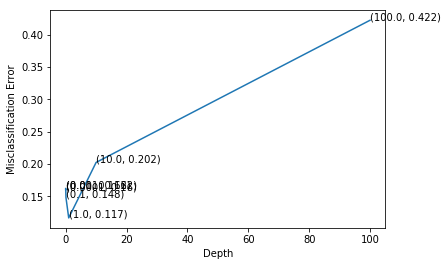

('the misclassification error for each alpha value is : ', array([0.16 , 0.162, 0.162, 0.148, 0.117, 0.202, 0.422]))


In [81]:
optimal_alpha_tfidf = CV_Error_Plot(X_train_tfidf_standarized_data,y_tr)


  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.62      0.78      0.69      4557
          1       0.95      0.90      0.93     21774

avg / total       0.89      0.88      0.89     26331


  CONFUSION MATRIX
[[ 3532  1025]
 [ 2131 19643]]

  Plot of CONFUSION MATRIX


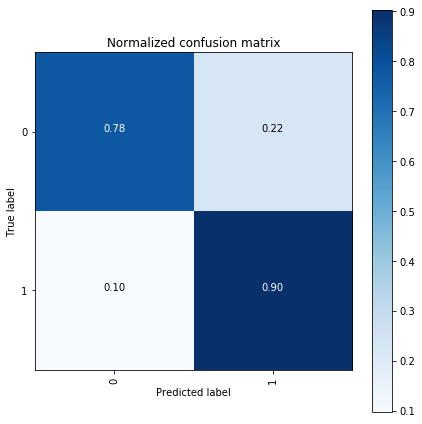

In [82]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_tfid)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_tfid)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

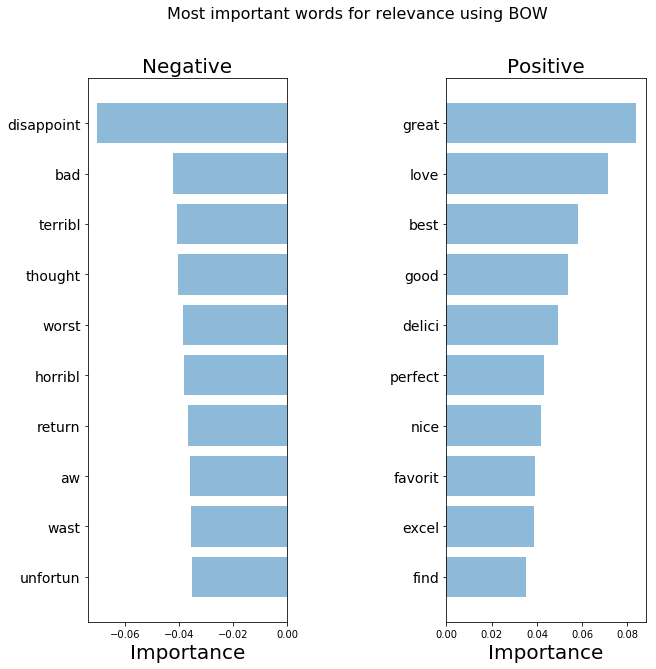

In [83]:
#Important Features in classifying the reviews using BOW
importance = get_most_important_features(count_vect, model_tfidf, 10)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance using BOW")

# SVM-AVGW2V

GRIDSEEARCH

In [13]:
best_estimator_avgw2v,best_params_avgw2v = SGD_GRIDSEARCH(X_train_AvgW2V_standarized_data,y_tr)
print best_estimator_avgw2v
print best_params_avgw2v

SGDClassifier(alpha=100.0, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
{'alpha': 100.0}


RANDOMSEARCH

In [14]:
best_estimator_avgw2v_random,best_params_avgw2v_random = SGD_RandomSearchCV(X_train_AvgW2V_standarized_data,y_tr)
print best_estimator_avgw2v_random
print best_params_avgw2v_random

SGDClassifier(alpha=0.08765283478824615, average=False,
       class_weight='balanced', epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
{'alpha': 0.08765283478824615}


Errors--Randomsearch

In [15]:
train_error_avgw2v_random,test_error_avgw2v_random,y_pred_ts_avgw2v_random,model_avgw2v_random=Train_Test_Error(best_params_avgw2v_random["alpha"],X_train_AvgW2V_standarized_data,y_tr,X_test_AvgW2V_standarized_data,y_test)


 Train error is : 0.196754662934

 Test error is : 0.224981960427


Errors--Gridsearch

In [16]:
train_error_avgw2v,test_error_avgw2v,y_pred_ts_avgw2v,model_avgw2v=Train_Test_Error(best_params_avgw2v["alpha"],X_train_AvgW2V_standarized_data,y_tr,X_test_AvgW2V_standarized_data,y_test)


 Train error is : 0.156635526187

 Test error is : 0.173065967871


CV-ErrorPlot


The optimal alpha is : 10.0


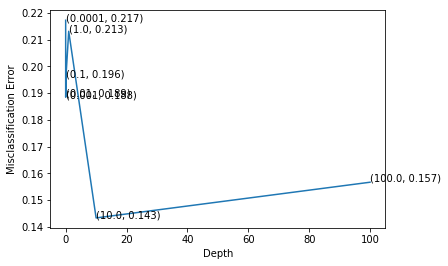

('the misclassification error for each alpha value is : ', array([0.217, 0.188, 0.189, 0.196, 0.213, 0.143, 0.157]))


In [17]:
optimal_alpha_AvgW2V = CV_Error_Plot(X_train_AvgW2V_standarized_data,y_tr)

Confusion Matrix


  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.41      0.67      0.51      4557
          1       0.92      0.80      0.85     21774

avg / total       0.83      0.78      0.79     26331


  CONFUSION MATRIX
[[ 3063  1494]
 [ 4430 17344]]

  Plot of CONFUSION MATRIX


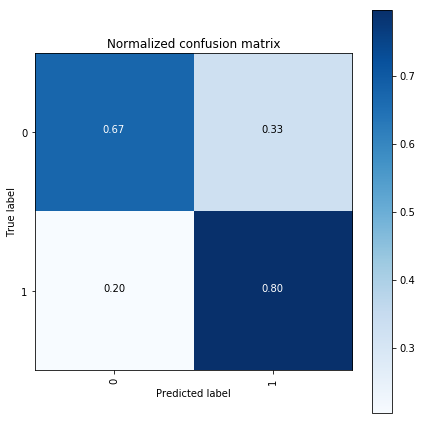

In [19]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_avgw2v_random)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_avgw2v_random)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# SVM- tfidfw2v

GridSearch

In [104]:
best_estimator_TFIDF_W2V,best_params_TFIDF_W2V = SGD_GRIDSEARCH(X_train_TFIDF_W2V_standarized_data,y_tr)
print best_estimator_TFIDF_W2V
print best_params_TFIDF_W2V

/usr/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SGDClassifier(alpha=0.01, average=False, class_weight='balanced', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
{'alpha': 0.01}


RandomSearch

In [105]:
best_estimator_TFIDF_W2V_random,best_params_TFIDF_W2V_random = SGD_RandomSearchCV(X_train_TFIDF_W2V_standarized_data,y_tr)
print best_estimator_TFIDF_W2V_random
print best_params_TFIDF_W2V_random

SGDClassifier(alpha=0.11750198876056539, average=False,
       class_weight='balanced', epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
{'alpha': 0.11750198876056539}


Errors- Random search

In [106]:
train_error_TFIDF_W2V_random,test_error_TFIDF_W2V_random,y_pred_ts_TFIDF_W2V_random,model_TFIDF_W2V_random=Train_Test_Error(best_params_TFIDF_W2V_random["alpha"],X_train_TFIDF_W2V_standarized_data,y_tr,X_test_TFIDF_W2V_standarized_data,y_test)


 Train error is : 0.220289053091

 Test error is : 0.269909992025


Errors- Grid search

In [107]:
train_error_TFIDF_W2V,test_error_TFIDF_W2V,y_pred_ts_TFIDF_W2V,model_TFIDF_W2V=Train_Test_Error(best_params_TFIDF_W2V["alpha"],X_train_TFIDF_W2V_standarized_data,y_tr,X_test_TFIDF_W2V_standarized_data,y_test)


 Train error is : 0.221786400182

 Test error is : 0.271694960313


CV-Error Plot


The optimal alpha is : 0.01


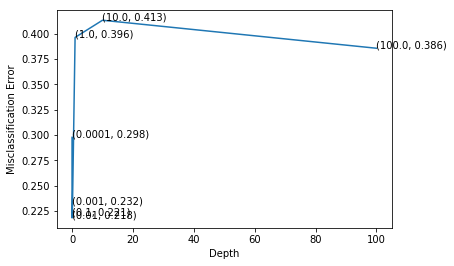

('the misclassification error for each alpha value is : ', array([0.298, 0.232, 0.218, 0.221, 0.396, 0.413, 0.386]))


In [109]:
optimal_alpha_tfidf = CV_Error_Plot(X_train_TFIDF_W2V_standarized_data,y_tr)

Confusion Matrix


  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.36      0.70      0.47      4557
          1       0.92      0.73      0.82     21774

avg / total       0.82      0.73      0.76     26331


  CONFUSION MATRIX
[[ 3199  1358]
 [ 5796 15978]]

  Plot of CONFUSION MATRIX


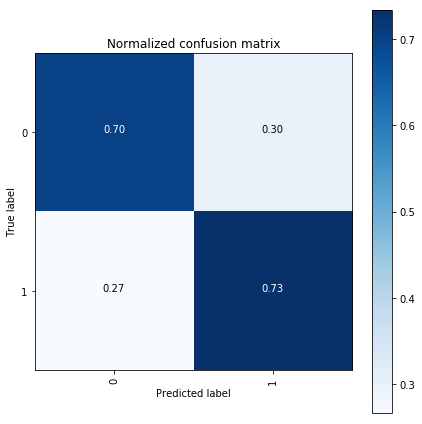

In [110]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_TFIDF_W2V)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_TFIDF_W2V)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# Summary

In [111]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorization Model", "SearchMethood", "Alpha", "Training Error","Test Error"]

x.add_row(["Bow", "GRID", best_params_bow["alpha"], round(train_error_bow*100,2),round(test_error_bow*100,2)])
x.add_row(["Bow", "Random", best_params_bow_random["alpha"],round(train_error_bow_random*100,2),round(test_error_bow_random*100,2)])

x.add_row(["TFIDF", "GRID", best_params_tfidf["alpha"],round(train_error_tfidf*100,2),round(test_error_tfid*100,2)])
x.add_row(["TFIDF", "Random", best_params_tfidf_random["alpha"],round(train_error_tfidf_random*100,2),round(test_error_tfidf_random*100,2)])

x.add_row(["AvgW2V", "GRID", best_params_avgw2v["alpha"],round(train_error_avgw2v*100,2),round(test_error_avgw2v*100,2)])
x.add_row(["AvgW2V", "Random", best_params_avgw2v_random["alpha"],round(train_error_avgw2v_random*100,2),round(test_error_avgw2v_random*100,2)])

x.add_row(["TFIDF-W2V", "GRID", best_params_TFIDF_W2V["alpha"],round(train_error_TFIDF_W2V*100,2),round(test_error_TFIDF_W2V*100,2)])
x.add_row(["TFIDF-W2V", "Random", best_params_TFIDF_W2V_random["alpha"],round(train_error_TFIDF_W2V_random*100,2),round(test_error_TFIDF_W2V_random*100,2)])


print(x)

+---------------------+---------------+---------------------+----------------+------------+
| Vectorization Model | SearchMethood |        Alpha        | Training Error | Test Error |
+---------------------+---------------+---------------------+----------------+------------+
|         Bow         |      GRID     |         1.0         |      6.31      |   11.01    |
|         Bow         |     Random    |  0.7538459825421077 |      6.48      |    11.4    |
|        TFIDF        |      GRID     |         1.0         |      6.65      |   11.99    |
|        TFIDF        |     Random    |  0.8142445523064147 |      6.43      |   12.09    |
|        AvgW2V       |      GRID     |         10.0        |     14.59      |   17.12    |
|        AvgW2V       |     Random    |  0.0784302921674187 |     19.54      |   22.46    |
|      TFIDF-W2V      |      GRID     |         0.01        |     22.18      |   27.17    |
|      TFIDF-W2V      |     Random    | 0.11750198876056539 |     22.03      |  

It is observed that SVM(SGD classifier with Hinge loss) performed well better with BOW and TFIDF when compared with AvgW2v,TFIDF-AVGW2V.

# SVC-AvgW2V 

In [9]:
import math as m
def SVM_GRIDSEARCH(X_train,y_train):
    tuned_parameters = [{'C': [m.pow(2,-3), m.pow(2,-2), m.pow(2,0), m.pow(2,1), m.pow(2,2)],                  
                        'gamma': [m.pow(2,-3), m.pow(2,-2), m.pow(2,0), m.pow(2,1), m.pow(2,2)]
                            }]  
    svm=SVC(class_weight = "balanced",kernel='rbf')
    model= GridSearchCV(svm,tuned_parameters, scoring = 'f1', cv=3,n_jobs=-1)
    model.fit(X_train, y_train)
    best_estimator= model.best_estimator_
    best_params = model.best_params_
    
    return best_estimator,best_params

In [10]:
best_estimator_avgw2v_svm,best_params_avgw2v_svm = SVM_GRIDSEARCH(X_train_AvgW2V_standarized_data,y_tr)
print best_estimator_avgw2v_svm
print best_params_avgw2v_svm

SVC(C=4.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 4.0, 'gamma': 0.125}


In [11]:
svm=SVC(C=4.0, cache_size=1600, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svm_model = svm.fit(X_train_AvgW2V_standarized_data, y_tr)

#Training Error
y_pred_tr = svm_model.predict(X_train_AvgW2V_standarized_data)
acc_tr = accuracy_score(y_tr, y_pred_tr)
train_error = 1-acc_tr
print('\n Train error is : {}'.format(train_error))

#Test Error
y_pred_ts = svm_model.predict(X_test_AvgW2V_standarized_data)
acc_ts = accuracy_score(y_test, y_pred_ts)
test_error = 1-acc_ts
print('\n Test error is : {}'.format(test_error))


 Train error is : 0.000488265355945

 Test error is : 0.169078272758



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.72      0.04      0.07      4557
          1       0.83      1.00      0.91     21774

avg / total       0.81      0.83      0.76     26331


  CONFUSION MATRIX
[[  170  4387]
 [   65 21709]]

  Plot of CONFUSION MATRIX


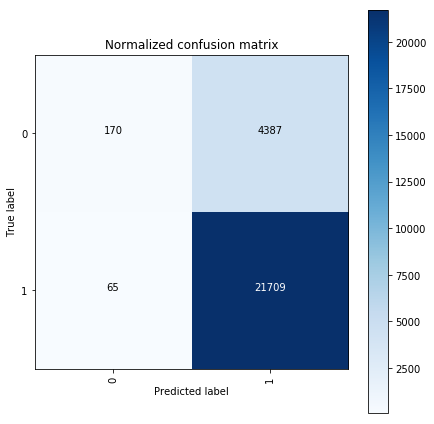

In [13]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=False, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()